In [3]:
import io
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from os import listdir
from skimage import io
from skimage.transform import resize
from scipy.misc import imresize
import keras
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from time import time
from keras.callbacks import TensorBoard
#import cv2

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'name_scope'

In [ ]:
%load_ext tensorboard.notebook

In [ ]:
print(np.__version__)

Note for Dr.Huang: Latest version of numpy not compatible with current verision of scikit-image. Had to revert to numpy 1.15.4

In [3]:
### Define the parameters
img_size = 64 
batch_size=64 
epochs=5
FAST_RUN = False
IMAGE_WIDTH = 64
IMAGE_HEIGHT= 64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

In [4]:
data_path = os.listdir('catdog_data/')
categories = []
for filename in data_path:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(0)
    else:
        categories.append(1)

model_df = pd.DataFrame({
    'image': data_path,
    'label': categories
    })

            image  label
482  dog.1187.jpg      1


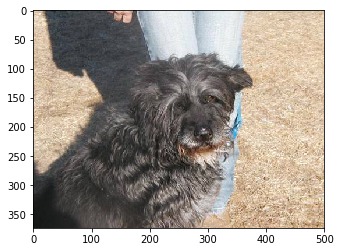

In [5]:
#plot the random choice of image 
rando_pic = random.choice(data_path)
image = load_img("catdog_data/"+rando_pic)
image_label = model_df.loc[model_df['image'] == rando_pic]

print(image_label)
plt.imshow(image)

In [6]:
train_df, test_df = train_test_split(model_df, test_size=0.10, random_state=1776)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [8]:
cat_imgpath = model_df['image'].loc[model_df['label']==0].tolist()
dog_imgpath = model_df['image'].loc[model_df['label']==1].tolist()

In [9]:
data_path = 'catdog_data/'

x_cat=[]
x_dog=[]
for img in cat_imgpath:
 cat_img = io.imread(data_path+img)
 x_cat.append(imresize(cat_img, (img_size, img_size, 3)))

for img in dog_imgpath:
 dog_img = io.imread(data_path+img)
 x_dog.append(imresize(dog_img, (img_size, img_size, 3)))

/home/davidchardage/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys
/home/davidchardage/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # This is added back by InteractiveShellApp.init_path()


In [10]:
y_cat = model_df['label'].loc[model_df['label']==0].tolist()
y_dog = model_df['label'].loc[model_df['label']==1].tolist()

In [11]:
x=np.asarray(x_cat+x_dog)
x=x/255 #divide x by scalar of 255 to normalize dataset between 0 and 1
y=np.append(y_cat,y_dog)
y = keras.utils.to_categorical(y)

In [12]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=30)

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# model.add(Dense(64))
# model.add(Dropout(0.1))
# model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 61506     
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 62,402
Trainable params: 62,402
Non-trainable params: 0
_________________________________________________________________


In [16]:
adamop=Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

model.fit(train_x, train_y,
 batch_size=batch_size,
 epochs=epochs,
 shuffle=True,
 callbacks=[tensorboard])

score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1259/1259 [==============================] - 2s 2ms/step - loss: 7.6451 - acc: 0.5036
Epoch 2/5
1259/1259 [==============================] - 2s 1ms/step - loss: 8.0597 - acc: 0.4972
Epoch 3/5
1259/1259 [==============================] - 2s 2ms/step - loss: 8.0597 - acc: 0.4972
Epoch 4/5
1259/1259 [==============================] - 2s 2ms/step - loss: 8.0597 - acc: 0.4972
Epoch 5/5
140/140 [==============================] - 0s 2ms/step
Test loss: 7.671614374433245
Test accuracy: 0.5214285722800663


In [ ]:
%tensorboard --logdir logs/

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# model.add(Dense(64))
# model.add(Dropout(0.1))
# model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()


Process is terminated.
